In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import os


In [4]:
IMAGE_SIZE = [224, 224]

train_path = os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\pneumonia_dataset\\train')
valid_path=  os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\pneumonia_dataset\\test')


In [5]:
vgg = VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [6]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
folders = glob('C:\\Users\\KUMAR HIREMATH\\Downloads\\pneumonia_dataset\\train\\*')

In [9]:
folders

['C:\\Users\\KUMAR HIREMATH\\Downloads\\pneumonia_dataset\\train\\normal',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\pneumonia_dataset\\train\\pneumonia']

In [10]:
x = Flatten()(vgg.output)

In [11]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\pneumonia_dataset\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2425 images belonging to 2 classes.


In [16]:
test_set=test_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\pneumonia_dataset\\test',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical')

Found 606 images belonging to 2 classes.


In [17]:
r=model.fit_generator(
training_set,
validation_data=test_set,
epochs=10,
steps_per_epoch=len(training_set),
validation_steps=len(test_set)
)

C:\Users\KUMAR HIREMATH\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
76/76 [==============================] - 726s 10s/step - loss: 1.1835 - accuracy: 0.5565 - val_loss: 0.6453 - val_accuracy: 0.6502
Epoch 2/10
76/76 [==============================] - 716s 9s/step - loss: 0.6045 - accuracy: 0.7040 - val_loss: 0.8781 - val_accuracy: 0.5743
Epoch 3/10
76/76 [==============================] - 722s 10s/step - loss: 0.6169 - accuracy: 0.6758 - val_loss: 1.2884 - val_accuracy: 0.4604
Epoch 4/10
76/76 [==============================] - 745s 10s/step - loss: 0.6922 - accuracy: 0.6424 - val_loss: 0.8921 - val_accuracy: 0.5875
Epoch 5/10
76/76 [==============================] - 725s 10s/step - loss: 0.5759 - accuracy: 0.7016 - val_loss: 0.7059 - val_accuracy: 0.6221
Epoch 6/10
76/76 [==============================] - 715s 9s/step - loss: 0.5860 - accuracy: 0.7072 - val_loss: 0.9244 - val_accuracy: 0.5792
Epoch 7/10
76/76 [==============================] - 775s 10s/step - loss: 0.6661 - accuracy: 0.6626 - val_loss: 0.7544 - val_accuracy: 0.6205
Epoch 8/

In [21]:
y_pred=model.predict(test_set)

In [18]:
r.history

{'loss': [0.8873781561851501,
  0.6284916400909424,
  0.6027166843414307,
  0.658343493938446,
  0.6258850693702698,
  0.6071293354034424,
  0.6475609540939331,
  0.6271436810493469,
  0.587719202041626,
  0.615420401096344],
 'accuracy': [0.6053608059883118,
  0.6812371015548706,
  0.6903092861175537,
  0.6589690446853638,
  0.67711341381073,
  0.7010309100151062,
  0.6779381632804871,
  0.6915463805198669,
  0.7183505296707153,
  0.7088660001754761],
 'val_loss': [0.6452983021736145,
  0.8781254887580872,
  1.2884258031845093,
  0.8920733332633972,
  0.7059180736541748,
  0.9243685007095337,
  0.7544181942939758,
  0.6973885297775269,
  0.7468110918998718,
  0.8649809956550598],
 'val_accuracy': [0.6501650214195251,
  0.5742574334144592,
  0.46039605140686035,
  0.5874587297439575,
  0.6221122145652771,
  0.5792078971862793,
  0.6204620599746704,
  0.6386138796806335,
  0.6336633563041687,
  0.6105610728263855]}

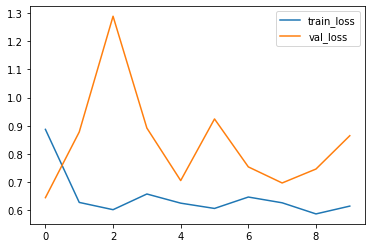

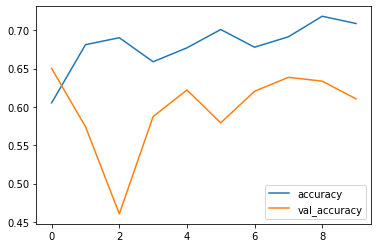

In [19]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [22]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [24]:
test=pd.read_csv('C:\\Users\\KUMAR HIREMATH\\Downloads\\pneumonia_dataset\\test.csv')

In [25]:
test.head()

,filename
0,CXR_test_519.png
1,CXR_test_578.png
2,CXR_test_359.png
3,CXR_test_573.png
4,CXR_test_471.png


In [26]:
sample=pd.DataFrame({'filename':test.filename,'label':y_pred})

In [27]:
sample.head()

,filename,label
0,CXR_test_519.png,0
1,CXR_test_578.png,0
2,CXR_test_359.png,0
3,CXR_test_573.png,0
4,CXR_test_471.png,0


In [28]:
sample['label']=np.where(sample['label']==1,'pneumonia','normal')

In [30]:
sample.to_csv('pneumonia.csv',index=False)